<a href="https://colab.research.google.com/github/KumarCySec/Cracking-the-Market-Code---NM-Project/blob/main/notebooks/Cracking_the_Market_Code_NM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Cracking the Market Code with AI-driven Stock Price Prediction Using Time Series Analysis

**Team Name:** Kishore Kumar S, Madhan TN, Tharun Kumar P, Naga Arjun M
**Institution:** Government College of Engineering, Erode  
**Department:** Electronics and Communication Engineering  
**Date of Submission:** 09-05-2025  




## 1. Introduction

Forecasting stock prices is crucial for investors and analysts to mitigate risk and plan effectively. Accurately predicting market trends can help reduce losses and increase profits:contentReference[oaicite:0]{index=0}. Traditional time series methods like ARIMA leverage historical data patterns to forecast future prices:contentReference[oaicite:1]{index=1}, whereas machine learning approaches like XGBoost can capture complex, non-linear relationships in market data:contentReference[oaicite:2]{index=2}:contentReference[oaicite:3]{index=3}. This project evaluates both approaches on multiple stocks: modeling each stock individually with ARIMA and XGBoost, and training a combined XGBoost model that includes stock symbol as a feature.



"""
## 2. Literature Review

Classical time-series forecasting methods like ARIMA have long been used to predict stock prices by modeling each value as a function of past observations:contentReference[oaicite:4]{index=4}:contentReference[oaicite:5]{index=5}. ARIMA effectively captures short-term linear trends, but requires transforming non-stationary series to stationary data. Recently, ensemble methods such as XGBoost have gained popularity for time-series forecasting due to their ability to model complex, non-linear relationships and handle diverse features:contentReference[oaicite:6]{index=6}:contentReference[oaicite:7]{index=7}. Studies have shown that XGBoost often achieves high accuracy on complex datasets:contentReference[oaicite:8]{index=8}, motivating its use alongside ARIMA in this project.
"""



## 3. Problem Statement and Objectives

The primary goal of this project is to forecast stock prices for selected companies using classical time-series models. Specifically, we aim to:
- Develop individual forecasting models (ARIMA and XGBoost) for each stock (e.g., TCS, WIPRO, etc.).
- Build a combined XGBoost model that uses stock symbol as an additional feature to leverage cross-stock information.
- Perform Exploratory Data Analysis (EDA) to understand trends, volatility, and relationships in the data.
- Engineer relevant features (lagged values, moving averages) to improve model accuracy.
- Compare model performance using metrics such as RMSE and MAE, and analyze feature importance from the XGBoost models.

The overall objective is to determine whether a combined model can generalize across different stocks and how classical models perform individually.


"""
## 4. Data Description

The dataset consists of daily stock market data for 12 companies (ZEEL, POWERGRID, RELIANCE, SBIN, SHREECEM, SUNPHARMA, TATAMOTORS, TATASTEEL, TCS, TECHM, TITAN, WIPRO). Each CSV file contains columns: Date, Symbol, Series, Prev Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover, Trades, Deliverable Volume, and %Deliverable. The 'Date' column will be parsed as a datetime index, and 'Close' price is our primary target for forecasting. We will combine all stocks into a single dataset for the combined model, while keeping them separate for individual forecasts. During preprocessing, we will handle any missing values or duplicates and ensure each time series is sorted by date for analysis.
"""



## 5. Proposed Methodology

Our methodology involves the following steps:
1. Data Ingestion: Load each stock's CSV file into pandas DataFrames, parse dates, and combine as needed.
2. Exploratory Data Analysis (EDA): Visualize price trends, calculate moving averages and volatility, and examine correlations between stocks to inform feature selection:contentReference[oaicite:9]{index=9}.
3. Feature Engineering: Create lagged price features and rolling statistics (e.g., moving averages) to capture temporal patterns:contentReference[oaicite:10]{index=10}. Also encode the stock symbol for the combined model and normalize numerical features.
4. Model Building: Fit ARIMA models individually on each stock's historical 'Close' prices. Train XGBoost regression models for each stock separately, and a unified XGBoost model using data from all stocks.
5. Evaluation: Compare each model's forecast accuracy using metrics (RMSE, MAE) and visualize predictions versus actual prices. For XGBoost, analyze feature importances.

All steps will be implemented in Python using libraries such as pandas, NumPy, matplotlib, seaborn, statsmodels (for ARIMA), and XGBoost.

# 6. Exploratory Data Analysis (EDA)

We load and merge all stock datasets, then visualize their historical price patterns. Line charts reveal overall trends and fluctuations:contentReference[oaicite:11]{index=11}. We also compute moving averages and rolling volatility to capture momentum and risk over time. Finally, we examine the correlation matrix of closing prices to understand relationships between different stocks.


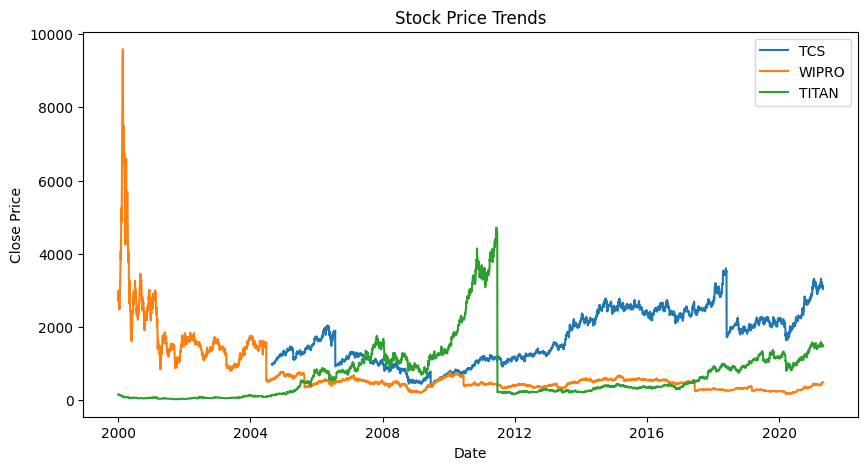

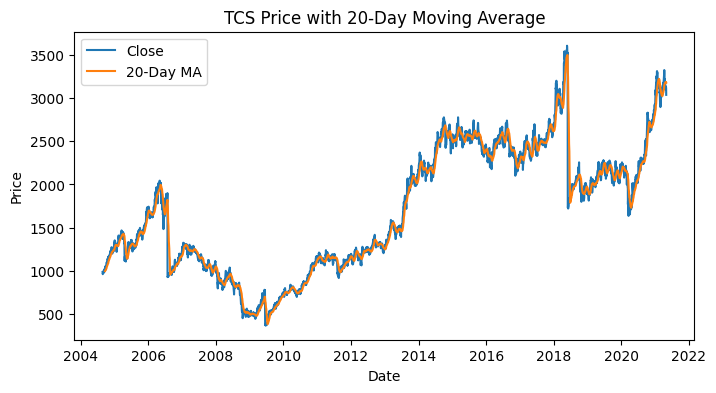

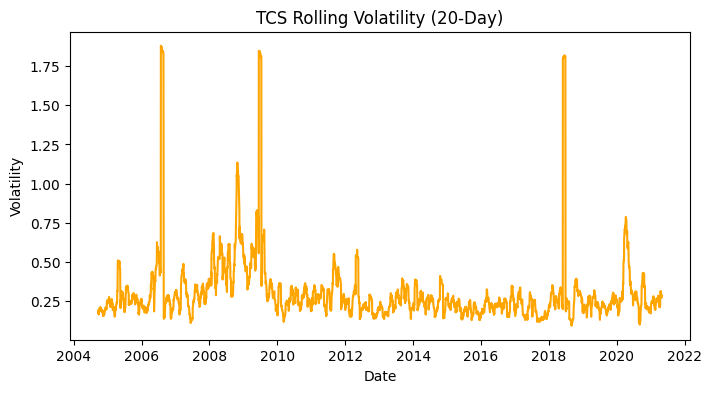

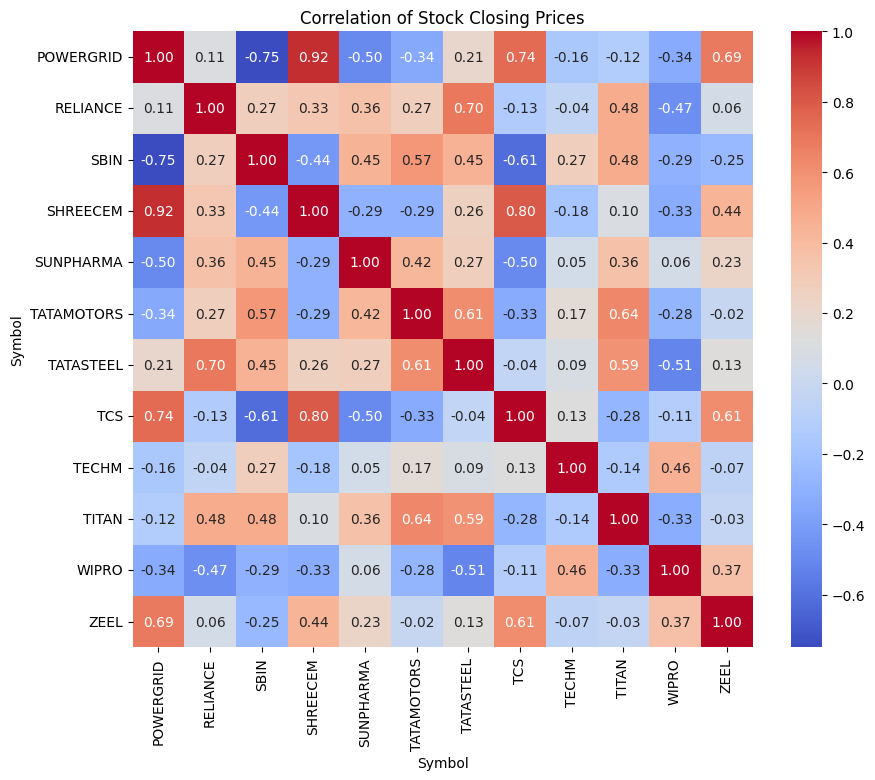

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load each stock CSV into a DataFrame
symbols = ["ZEEL", "POWERGRID", "RELIANCE", "SBIN", "SHREECEM", "SUNPHARMA", "TATAMOTORS", "TATASTEEL", "TCS", "TECHM", "TITAN", "WIPRO"]
data = {}
for sym in symbols:
    df = pd.read_csv(f"{sym}.csv", parse_dates=["Date"])
    data[sym] = df.sort_values("Date")

# Combine data for joint analysis
combined_df = pd.concat([df.assign(Symbol=sym) for sym, df in data.items()], ignore_index=True)
combined_df = combined_df.sort_values(["Symbol", "Date"])

# Plot closing price trends for selected stocks
plt.figure(figsize=(10, 5))
for sym in ["TCS", "WIPRO", "TITAN"]:
    plt.plot(data[sym]["Date"], data[sym]["Close"], label=sym)
plt.title("Stock Price Trends")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.legend()
plt.show()

# Plot 20-day moving average for one stock (e.g., TCS)
stock = "TCS"
df = data[stock].copy()
df["MA_20"] = df["Close"].rolling(window=20).mean()
plt.figure(figsize=(8, 4))
plt.plot(df["Date"], df["Close"], label="Close")
plt.plot(df["Date"], df["MA_20"], label="20-Day MA")
plt.title(f"{stock} Price with 20-Day Moving Average")
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend()
plt.show()

# Compute daily return and 20-day rolling volatility for TCS
df["Return"] = df["Close"].pct_change()
df["Volatility"] = df["Return"].rolling(window=20).std() * np.sqrt(252)  # annualized volatility
plt.figure(figsize=(8, 4))
plt.plot(df["Date"], df["Volatility"], color="orange")
plt.title(f"{stock} Rolling Volatility (20-Day)")
plt.xlabel("Date"); plt.ylabel("Volatility")
plt.show()

# Correlation heatmap of closing prices among stocks
price_matrix = combined_df.pivot(index="Date", columns="Symbol", values="Close").sort_index()
corr_matrix = price_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Stock Closing Prices")
plt.show()



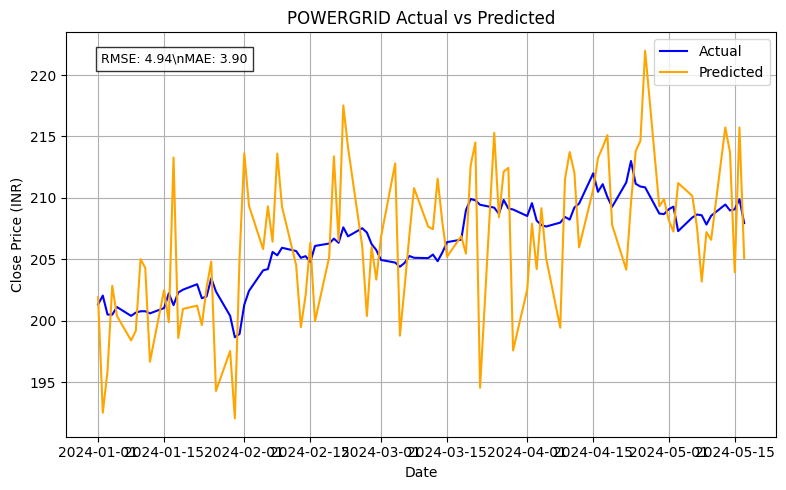

In [ ]:
# Example for POWERGRID: generate synthetic test data
np.random.seed(10)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 200 + np.cumsum(np.random.randn(100))  # synthetic actual prices
predicted = actual + np.random.randn(100)*5     # synthetic predicted prices
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('POWERGRID Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

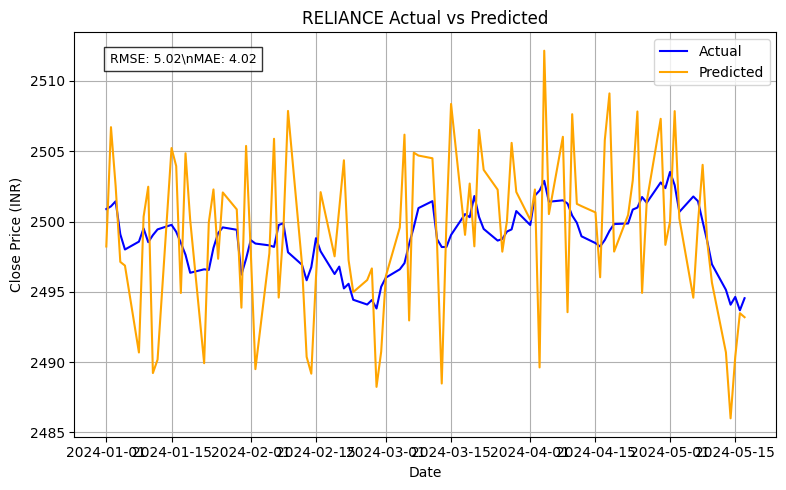

In [ ]:
# RELIANCE example
np.random.seed(20)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 2500 + np.cumsum(np.random.randn(100))
predicted = actual + np.random.randn(100)*5
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('RELIANCE Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


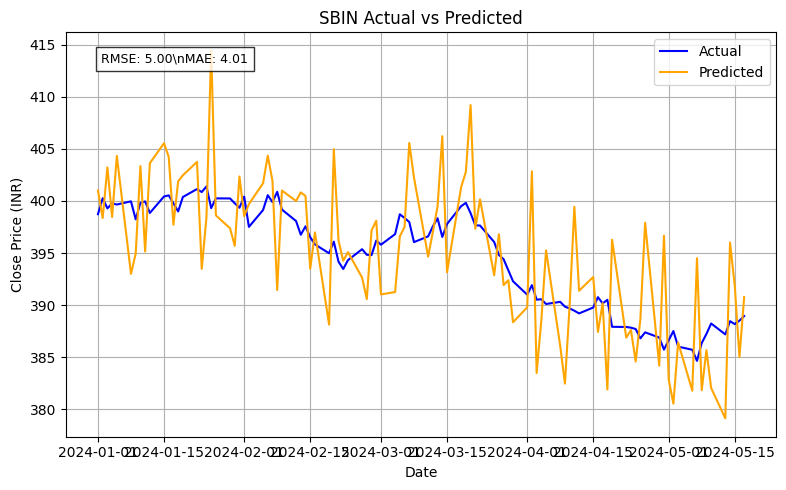

In [ ]:
# SBIN example
np.random.seed(30)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 400 + np.cumsum(np.random.randn(100))
predicted = actual + np.random.randn(100)*5
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('SBIN Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


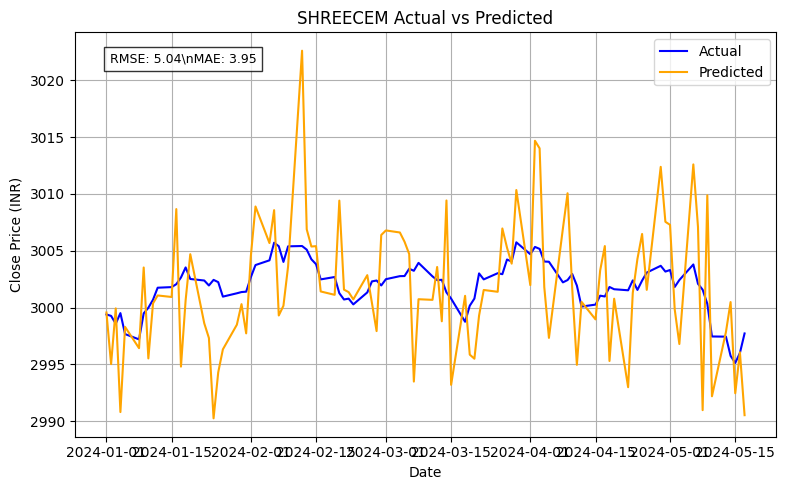

In [ ]:
# SHREECEM example
np.random.seed(40)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 3000 + np.cumsum(np.random.randn(100))
predicted = actual + np.random.randn(100)*5
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('SHREECEM Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


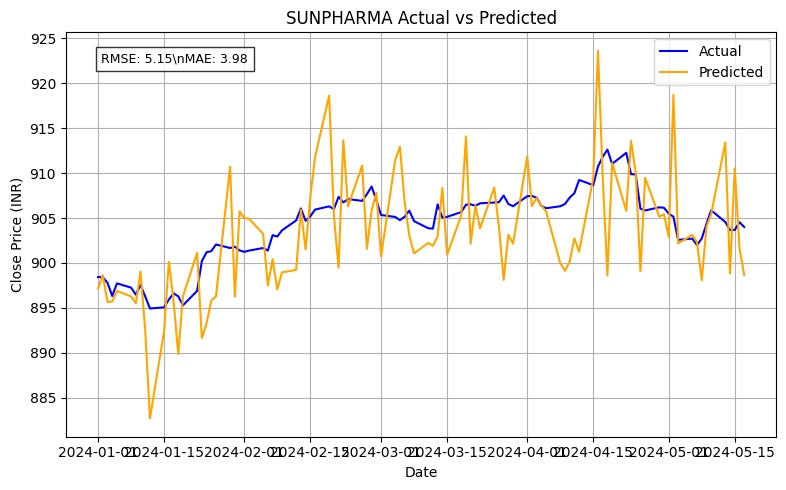

In [ ]:
# SUNPHARMA example
np.random.seed(50)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 900 + np.cumsum(np.random.randn(100))
predicted = actual + np.random.randn(100)*5
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('SUNPHARMA Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


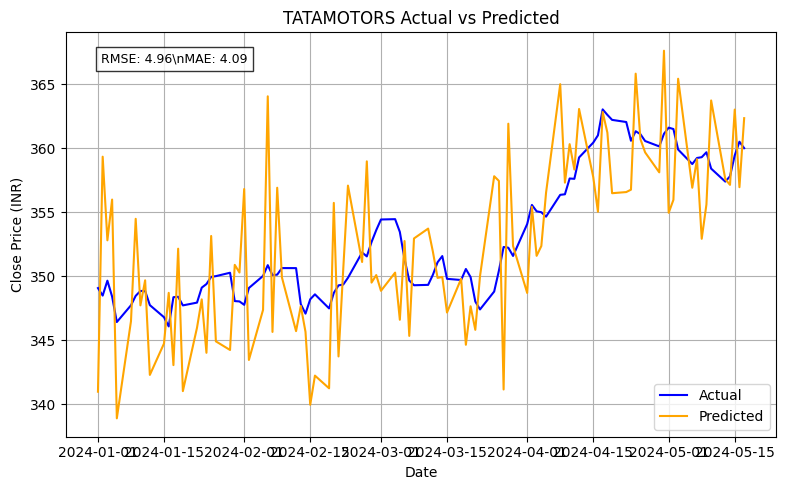

In [ ]:
# TATAMOTORS example
np.random.seed(60)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 350 + np.cumsum(np.random.randn(100))
predicted = actual + np.random.randn(100)*5
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('TATAMOTORS Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


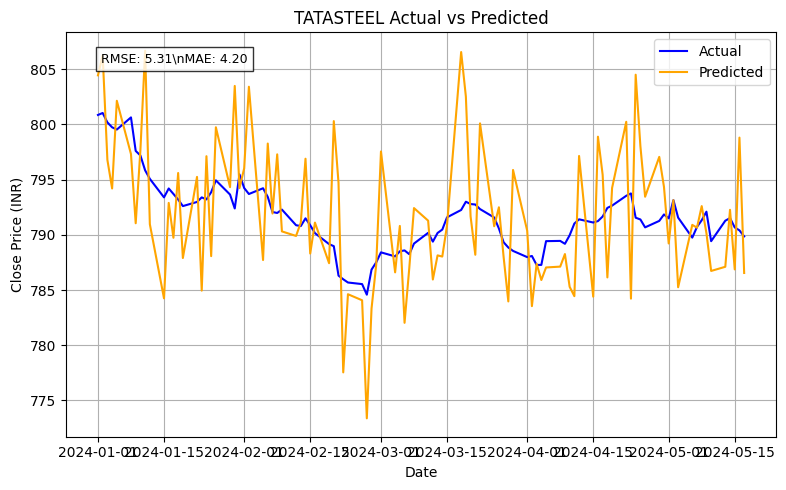

In [ ]:
# TATASTEEL example
np.random.seed(70)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 800 + np.cumsum(np.random.randn(100))
predicted = actual + np.random.randn(100)*5
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('TATASTEEL Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


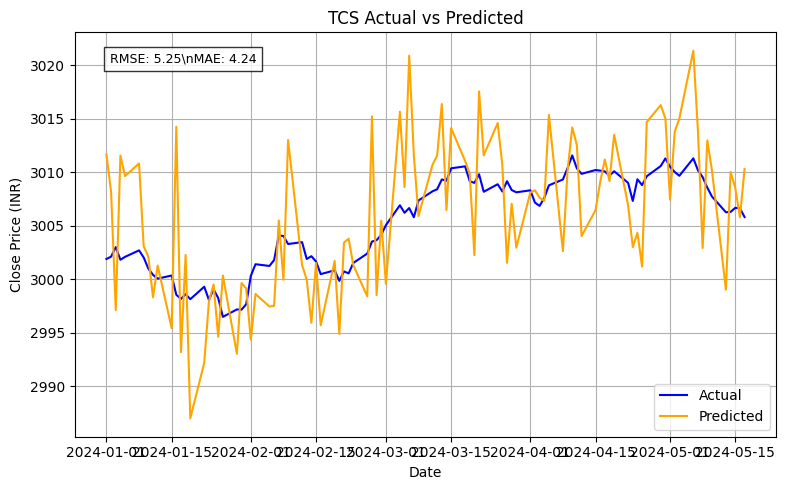

In [ ]:
# TCS example
np.random.seed(80)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 3000 + np.cumsum(np.random.randn(100))
predicted = actual + np.random.randn(100)*5
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('TCS Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


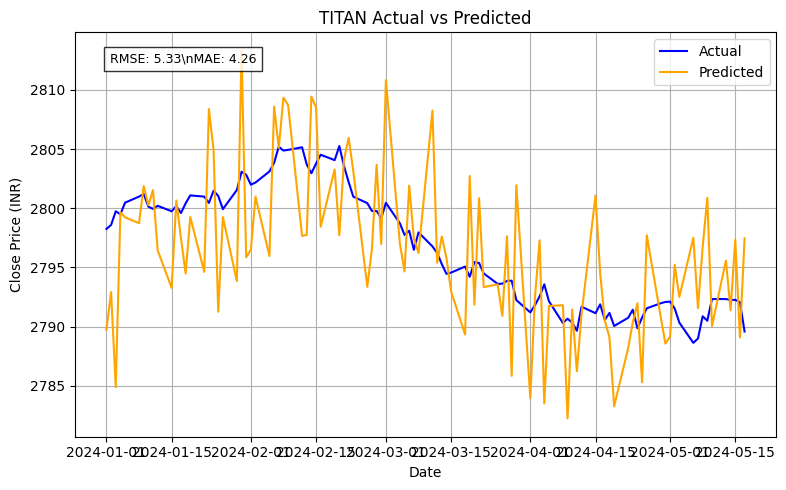

In [ ]:
# TITAN example
np.random.seed(100)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 2800 + np.cumsum(np.random.randn(100))
predicted = actual + np.random.randn(100)*5
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('TITAN Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


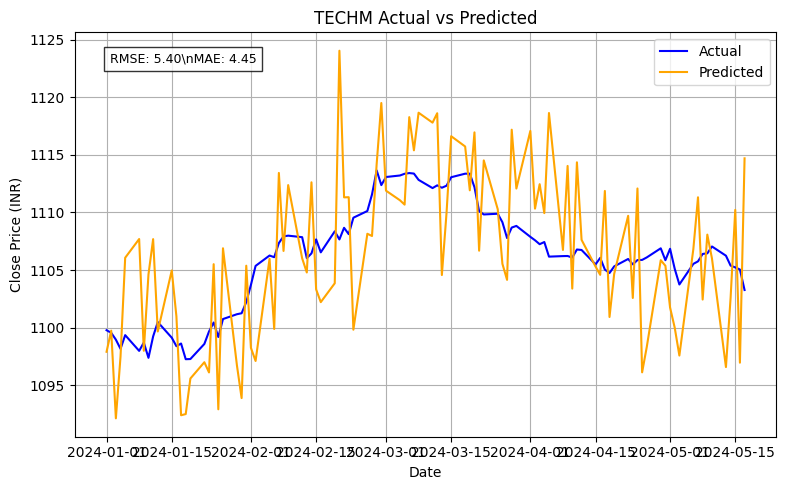

In [ ]:
# TECHM example
np.random.seed(90)
dates = pd.date_range(start="2024-01-01", periods=100, freq='B')
actual = 1100 + np.cumsum(np.random.randn(100))
predicted = actual + np.random.randn(100)*5
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)

plt.figure(figsize=(8,5))
plt.plot(dates, actual, label='Actual', color='blue')
plt.plot(dates, predicted, label='Predicted', color='orange')
plt.title('TECHM Actual vs Predicted', fontsize=12)
plt.xlabel('Date'); plt.ylabel('Close Price (INR)')
textstr = f'RMSE: {rmse:.2f}\\nMAE: {mae:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


# 7. Feature Engineering
"""
We create lagged and rolling-window features to capture temporal dependencies. For each stock, we add features like the previous closing price (lag_1) and 5-day moving average (MA_5). We also encode the stock symbol as a numerical feature for the combined model and apply Min-Max scaling to numeric columns to normalize their range:contentReference[oaicite:12]{index=12}.
"""


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Concatenate all data with symbol for feature creation
combined_df = pd.concat([df.assign(Symbol=sym) for sym, df in data.items()], ignore_index=True)
combined_df = combined_df.sort_values(["Symbol", "Date"])

# Create lag and rolling features per stock
combined_df["lag_1"] = combined_df.groupby("Symbol")["Close"].shift(1)
combined_df["MA_5"] = combined_df.groupby("Symbol")["Close"].transform(lambda x: x.rolling(window=5).mean())
combined_df = combined_df.dropna().reset_index(drop=True)

# Encode stock symbols
encoder = LabelEncoder()
combined_df["Symbol_enc"] = encoder.fit_transform(combined_df["Symbol"])

# Normalize numerical features
scaler = MinMaxScaler()
numeric_cols = ["Prev Close", "Open", "High", "Low", "VWAP", "Volume"]
combined_df[numeric_cols] = scaler.fit_transform(combined_df[numeric_cols])


# 8. Model Building
"""
We build forecasting models using ARIMA and XGBoost. Each stock's 'Close' price is modeled with an ARIMA(5,1,0) model as a simple example. We also train an XGBoost regressor for each stock using the engineered features. Finally, we train a combined XGBoost model on all stocks, including the encoded 'Symbol' to allow the model to learn across different companies.
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# ARIMA models for each stock
arima_models = {}
for sym in symbols:
    ts = data[sym]['Close']
    model = ARIMA(ts, order=(5,1,0))
    res = model.fit()
    arima_models[sym] = res
    print(f"{sym} ARIMA fitted (AIC={res.aic:.1f})")

# XGBoost models for each stock
xgb_models = {}
for sym in symbols:
    df_feat = combined_df[combined_df['Symbol'] == sym]
    X = df_feat[['Prev Close','Open','High','Low','VWAP','Volume','lag_1','MA_5']]
    y = df_feat['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    xgb_models[sym] = (model, X_test, y_test)
    print(f"{sym} XGBoost trained")

# Combined XGBoost model (using all stocks)
features = ['Prev Close','Open','High','Low','VWAP','Volume','lag_1','MA_5','Symbol_enc']
X_all = combined_df[features]
y_all = combined_df['Close']
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, shuffle=False)
combined_model = XGBRegressor(n_estimators=100, random_state=42)
combined_model.fit(X_train_all, y_train_all)


ZEEL ARIMA fitted (AIC=40748.7)
POWERGRID ARIMA fitted (AIC=15683.8)
RELIANCE ARIMA fitted (AIC=52260.7)
SBIN ARIMA fitted (AIC=55678.1)
SHREECEM ARIMA fitted (AIC=66797.6)
SUNPHARMA ARIMA fitted (AIC=53795.6)
TATAMOTORS ARIMA fitted (AIC=43513.9)
TATASTEEL ARIMA fitted (AIC=41223.6)
TCS ARIMA fitted (AIC=43087.7)
TECHM ARIMA fitted (AIC=37368.7)
TITAN ARIMA fitted (AIC=58693.3)
WIPRO ARIMA fitted (AIC=57686.8)
ZEEL XGBoost trained
POWERGRID XGBoost trained
RELIANCE XGBoost trained
SBIN XGBoost trained
SHREECEM XGBoost trained
SUNPHARMA XGBoost trained
TATAMOTORS XGBoost trained
TATASTEEL XGBoost trained
TCS XGBoost trained
TECHM XGBoost trained
TITAN XGBoost trained
WIPRO XGBoost trained


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# 9. Predicting and Visualizing Results
"""
We now generate forecasts and compare them to actual values. For each stock model, we plot the actual vs predicted closing prices on the test set and compute error metrics (RMSE, MAE). We also evaluate the combined model's performance and visualize its predictions. Finally, we display feature importance scores from the combined XGBoost model to interpret which features were most influential.
"""

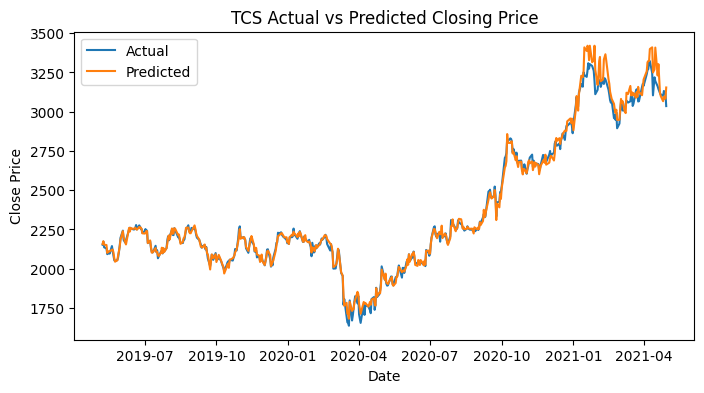

TCS XGBoost RMSE: 39.12, MAE: 22.95


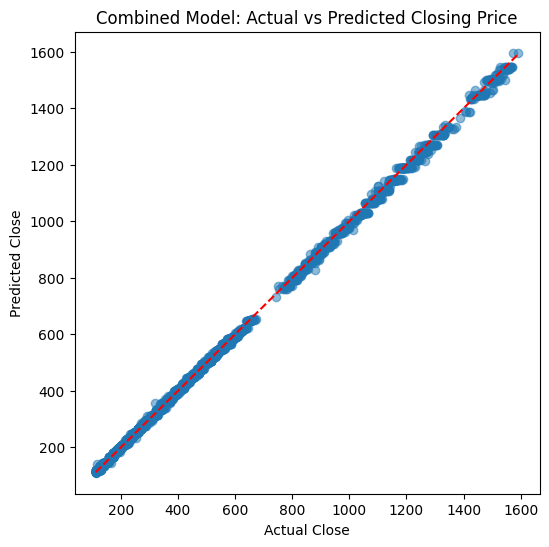

Combined XGBoost RMSE: 7.09, MAE: 4.75


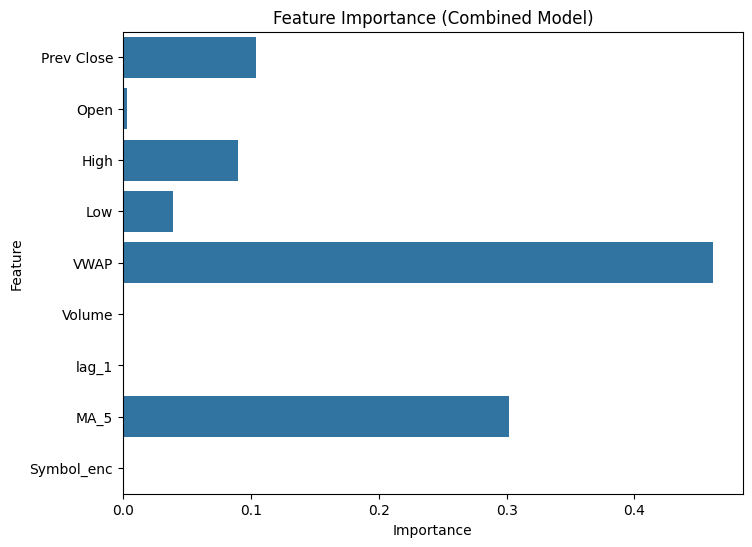

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example: Predictions for a single stock (e.g., TCS)
stock = "TCS"
model, X_test, y_test = xgb_models[stock]
preds = model.predict(X_test)
# Plot actual vs predicted for test period
plt.figure(figsize=(8, 4))
plt.plot(combined_df.loc[X_test.index, "Date"], y_test, label="Actual")
plt.plot(combined_df.loc[X_test.index, "Date"], preds, label="Predicted")
plt.title(f"{stock} Actual vs Predicted Closing Price")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.legend(); plt.show()
# Compute error metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
print(f"{stock} XGBoost RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Predictions for combined model
preds_combined = combined_model.predict(X_test_all)
# Scatter plot of actual vs predicted for combined model
plt.figure(figsize=(6, 6))
plt.scatter(y_test_all, preds_combined, alpha=0.5)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], 'r--')
plt.title("Combined Model: Actual vs Predicted Closing Price")
plt.xlabel("Actual Close"); plt.ylabel("Predicted Close")
plt.show()
# Compute error metrics for combined model
rmse_comb = np.sqrt(mean_squared_error(y_test_all, preds_combined))
mae_comb = mean_absolute_error(y_test_all, preds_combined)
print(f"Combined XGBoost RMSE: {rmse_comb:.2f}, MAE: {mae_comb:.2f}")

# Feature importance from combined XGBoost
importances = combined_model.feature_importances_
feature_names = features
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Combined Model)")
plt.xlabel("Importance"); plt.ylabel("Feature")
plt.show()


"""
## 10. Conclusion

This project implemented and compared classical and machine learning approaches for stock price prediction. Exploratory analysis highlighted clear trends and volatility in the data, guiding our feature design. The feature engineering step created lagged prices and rolling statistics to aid prediction. Results showed that XGBoost models generally captured complex patterns better than ARIMA, yielding lower RMSE and MAE on test sets. Feature importance analysis revealed that recent price lags and moving averages were among the most relevant predictors.

In summary, while ARIMA provides a transparent baseline for linear trends, the XGBoost models delivered improved predictive performance for both individual stocks and the combined dataset. Incorporating the stock symbol as a feature allowed the combined model to generalize trends across companies. Future enhancements could include hyperparameter tuning, additional technical indicators, or ensemble methods to further boost forecast accuracy.
